# Iris_dataset Analysis

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\Sukanya\Desktop\Study\Machine Learning Project Datasets\iris.csv")
data.head(3)

,Sepal Length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,Sepal Length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data['Class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Class, dtype: int64

In [6]:
data['Id'] = data['Class'].replace(['Iris-setosa','Iris-virginica','Iris-versicolor'],[1,2,3]) 

# Data Visualisation

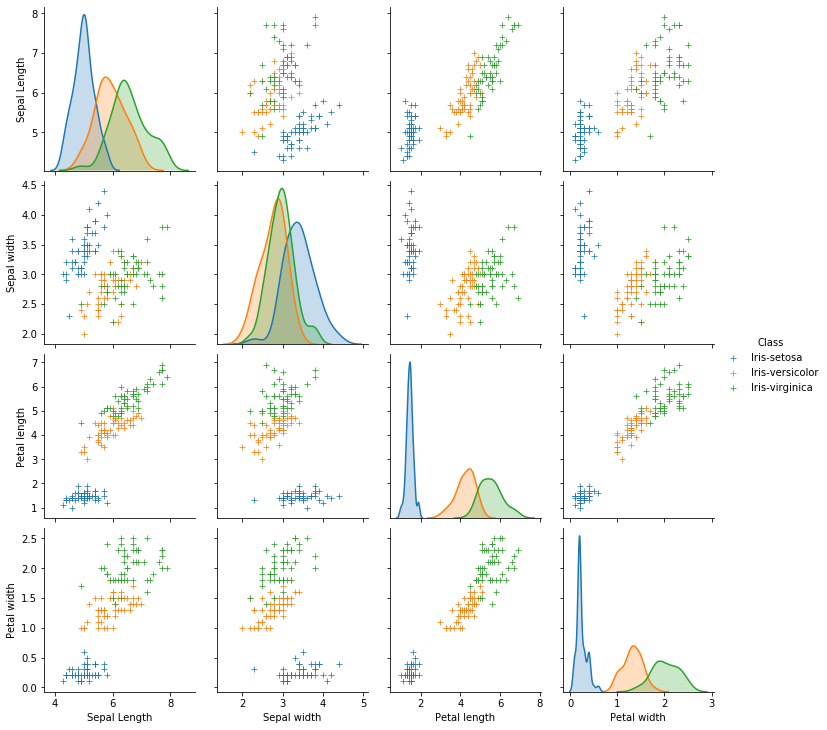

In [7]:
tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Class', markers='+')
plt.show()

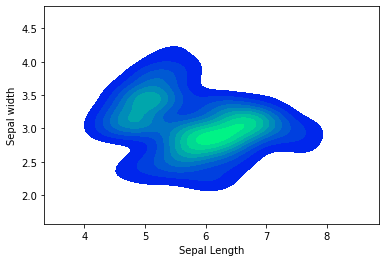

In [8]:
sns.kdeplot(data['Sepal Length'],  
            data['Sepal width'], 
            color='winter', shade=True, Label='Iris_Setosa', 
            cmap="winter", shade_lowest=False);


# Model Fitting

In [9]:
# machine learning
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as holdout

In [10]:
X = data.drop(['Id', 'Class'], axis=1)
y = data['Class']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [11]:
#Train-test split
X_train, X_test, y_train, y_test = holdout(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [12]:
#Logistic-regression
warnings.filterwarnings("ignore")
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

96.67

In [13]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, Y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [14]:
print(metrics.classification_report(y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [15]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

95.83

In [16]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, Y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [17]:
print(metrics.classification_report(y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [18]:
#K-nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

95.0

In [19]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, Y_pred)
print(cm)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [20]:
print(metrics.classification_report(y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [21]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [22]:
print(metrics.classification_report(y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [23]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, Y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [24]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [25]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, Y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [26]:
print(metrics.classification_report(y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [27]:
#K-nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

95.0

In [28]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, Y_pred)
print(cm)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [29]:
print(metrics.classification_report(y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [30]:
# NaiveBayes Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)
acc_NBG = round(gnb.score(X_train, y_train) * 100, 2)
acc_NBG

95.0

In [31]:
#Confusion Matrix
cm = metrics.confusion_matrix(y_test, Y_pred)
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [32]:
print(metrics.classification_report(y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [33]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN',  
              'Decision Tree','Random Forest','Naive Bayes Gaussian Classifier'],
    'Score': [acc_log, acc_svc, acc_knn, 
              acc_decision_tree,acc_random_forest,acc_NBG]})
models.sort_values(by='Score', ascending=True)

,Model,Score
2,KNN,95.00
5,Naive Bayes Gaussian Classifier,95.00
1,Support Vector Machines,95.83
0,Logistic Regression,96.67
3,Decision Tree,100.00
4,Random Forest,100.00
